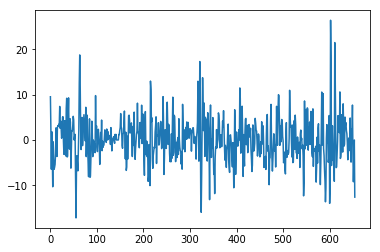

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

datos = pd.read_csv('Session4data.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:655] # leave the last 5 observations to compare with the forecasted values

plt.plot(y)
plt.show()

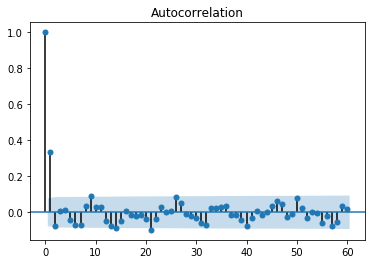

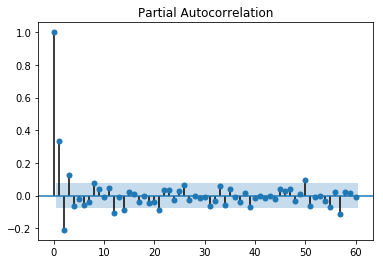

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 60 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags)
plt.show()

In [4]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the original series
Statistic Value: -12.16206569304393
p-value: 1.4858156293415478e-22


                              ARMA Model Results                              
Dep. Variable:               Serie.MA   No. Observations:                  655
Model:                     ARMA(0, 2)   Log Likelihood               -1904.878
Method:                       css-mle   S.D. of innovations              4.433
Date:                Sun, 25 Sep 2022   AIC                           3817.756
Time:                        11:46:04   BIC                           3835.694
Sample:                             0   HQIC                          3824.711
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1641      0.238      0.690      0.490      -0.302       0.630
ma.L1.Serie.MA     0.4448      0.040     11.213      0.000       0.367       0.523
ma.L2.Serie.MA    -0.0722      0.039

C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


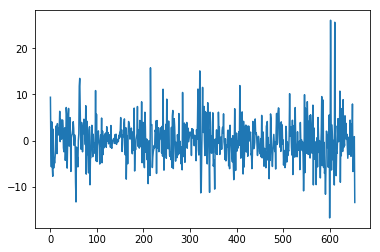

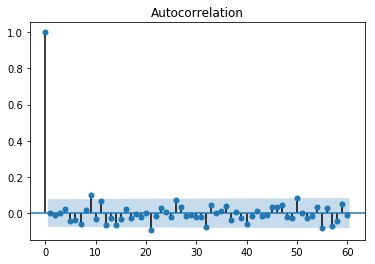

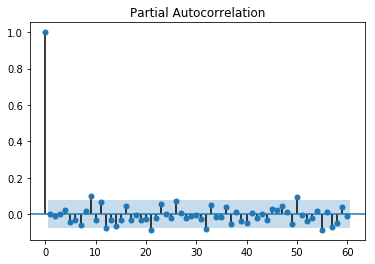

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = ARIMA(y, order = (0,0,2))
model_fit=model.fit(disp=0)
print(model_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=model_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags)
plt.show()

In [7]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the residuals")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the residuals
Statistic Value: -25.429385162231757
p-value: 0.0


Ljung-Box: Statistic value [23.34330985] p-value [0.27225335]
Shapido: Statistic value 0.9626041650772095 p-value 7.2215328335289986e-12


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


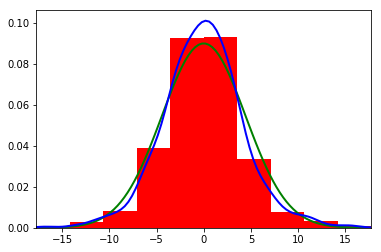

In [9]:
# Box test for autocorrelations

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[20])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -4*sigma, mu +4*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 4*std, mean + 4*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 4*std, mean + 4*std)

plt.show()

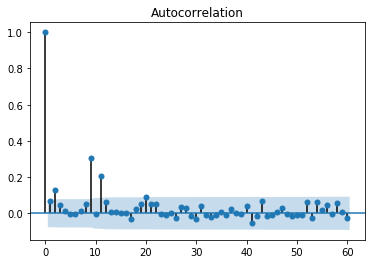

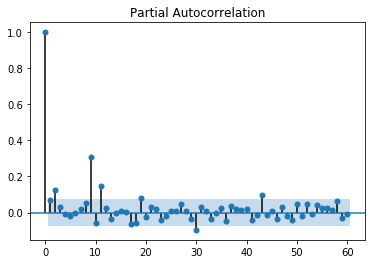

Ljung-Box for squared residuals
Statistic value [118.68795364] p_value [4.98679759e-16]


In [10]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[20])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

point predictions [-5.85740232  1.131485    0.16405377  0.16405377  0.16405377]
forecasting errors [4.43294668 4.85170394 4.86225112 4.86225112 4.86225112]


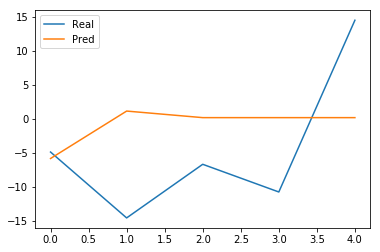

In [11]:
y_pred = model_fit.forecast(steps = 5)
print("point predictions",y_pred[0])
print("forecasting errors",y_pred[1])
# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
real =yy[655:660].reset_index(drop=True)
plt.plot(real, label = 'Real')
plt.plot(y_pred[0], label = 'Pred')
plt.legend()
plt.show()

In [12]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -8.425682171262434 Upper limit 97.5%: 9.236332366595246
95% confidence intervals assuming normality
Normal Percentile 2.5%: -8.693864924895747 Normal Percentile 97.5%: 8.693864924895747
